<a href="https://colab.research.google.com/github/reneronaldo10/PROCESAMIENTO-DE-IMAGENES/blob/main/PRACTICAS_3/Practica_N%C2%B09_Procesamiento_morfol%C3%B3gico_PDSeI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>PRACTICA PDI 09</font>

**Integrantes**

1. Alcantara Vásquez Jorge Cristhofer

2. Gutierrez Córdova Rene Ronaldo

3. Quezada Portilla Diego Armando

4. Vasquez Silva Augusto Martin


### 1. Aplique las operaciones morfologicas de: Dilatación, erosión, apertura y cierre a la imagen broken. png
* La imagen debe ser previamente convertida a escala de grises, y binarizada usando un umbral de 128
* Experimente con distintos elementos estructurantes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

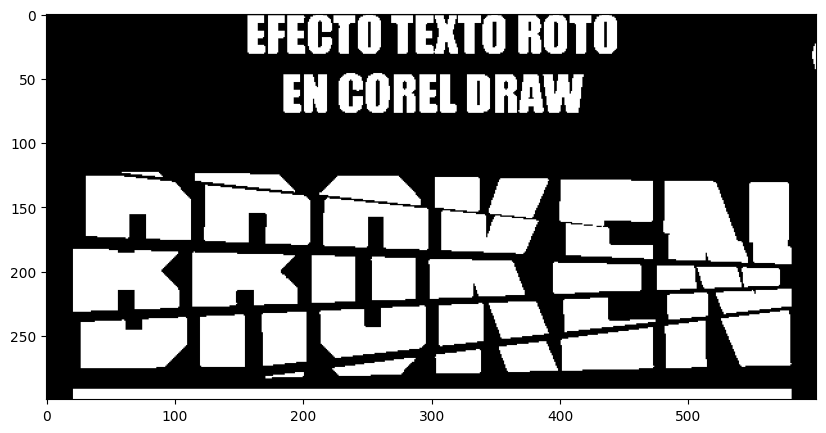

In [ ]:
img = cv2.imread("Imagenes/broken.png",0)
img = np.uint8(img > 128)

plt.subplots(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
selem3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

img_dil = cv2.dilate(img, selem2, iterations = 2)
img_ero = cv2.erode(img, selem2, iterations = 3)
img_ope = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem2)
img_clo = cv2.morphologyEx(img, cv2.MORPH_CLOSE, selem2)

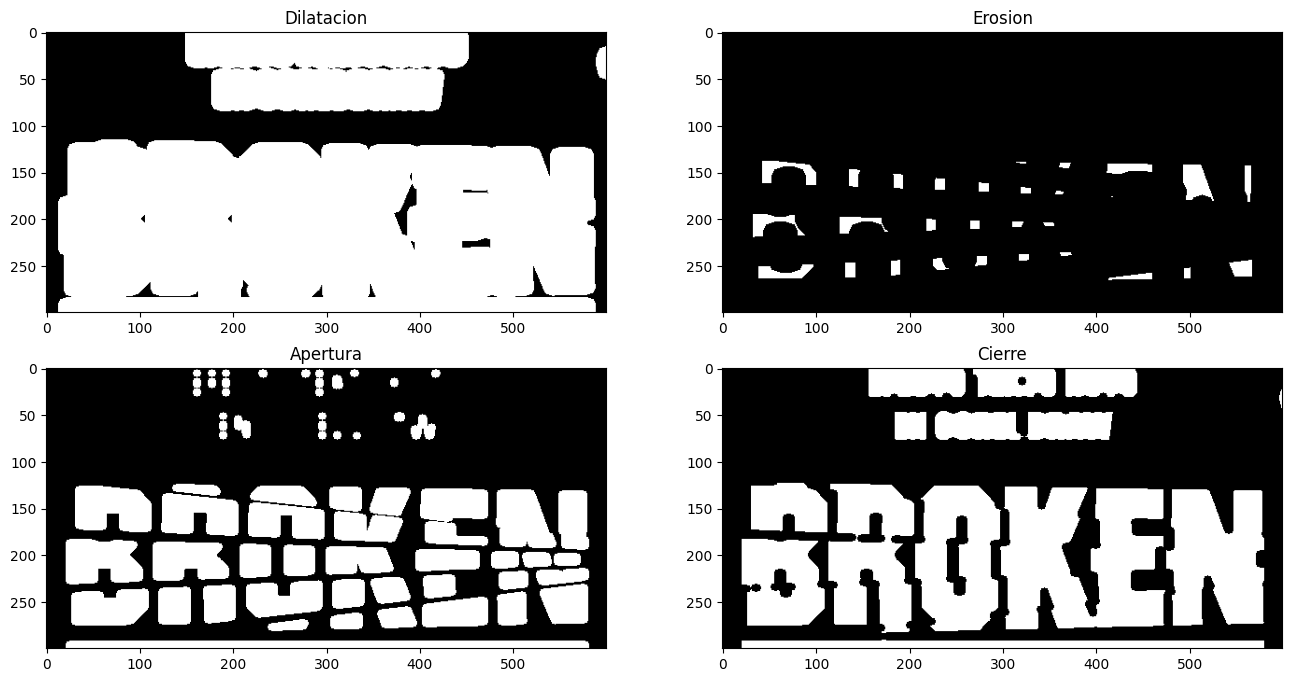

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
plt.subplot(221)
plt.imshow(img_dil, cmap="gray")
plt.title("Dilatacion")
plt.subplot(222)
plt.imshow(img_ero, cmap="gray")
plt.title("Erosion")
plt.subplot(223)
plt.imshow(img_ope, cmap="gray")
plt.title("Apertura")
plt.subplot(224)
plt.imshow(img_clo, cmap="gray")
plt.title("Cierre")
plt.show()

```
1. Tiene algún efecto la forma y tamaño del elemento estructurante en las operaciones de morfología?

La forma del elemento estructurante rectangular, circular, lineal, etc. determina qué tipos de patrones o estructuras en la imagen serán preservados, eliminados o modificados. Por ejemplo, un elemento circular puede ser más adecuado para procesar objetos curvos, mientras que uno lineal es útil para detectar líneas o bordes en una dirección específica.

2. En que situaciones usaría una apertura y un cierre?

Apertura:

Se utiliza cuando necesitas eliminar protuberancias o irregularidades externas pequeñas en los bordes de los objetos, como artefactos de ruido que sobresalen.
Es ideal para separar objetos que están ligeramente conectados por puntos finos, preservando la forma general del objeto principal.
Por ejemplo, en imágenes médicas, puede ser útil para eliminar estructuras pequeñas no deseadas alrededor de un órgano principal.


Cierre:

Es adecuado para rellenar huecos internos pequeños dentro de los objetos, como agujeros o discontinuidades en superficies que deberían ser sólidas.
Ayuda a unir componentes desconectados que están cerca, formando un único objeto continuo.
Por ejemplo, en el análisis de texto en imágenes escaneadas, se puede usar para completar letras fragmentadas o interrumpidas.

### 2. 1. Aplique las operaciones morfologicas de  Black y White Top Hat implementadas en OpenCV  a "Cosmos.jpg"

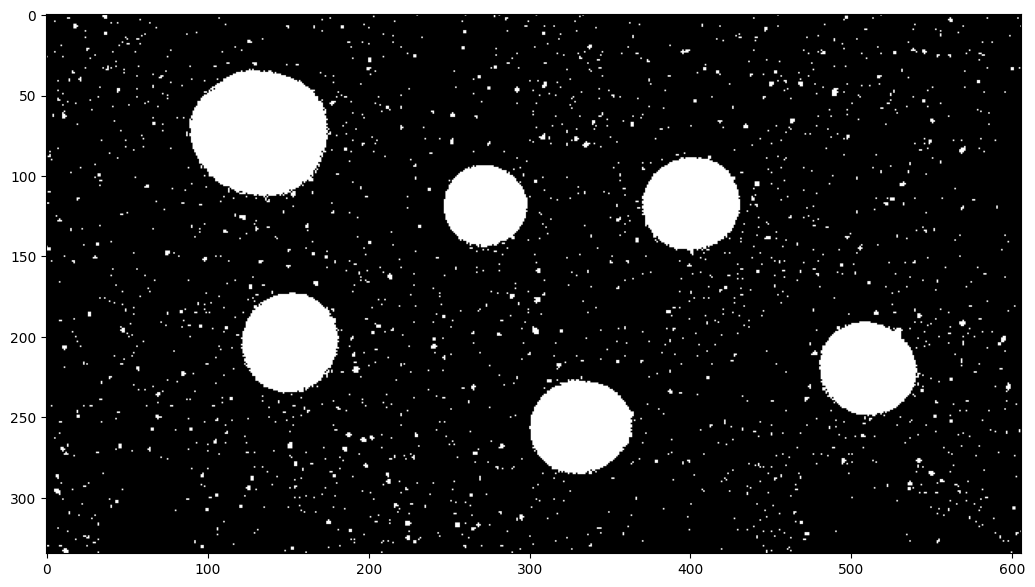

In [ ]:
img = cv2.imread("Imagenes/Cosmos.jpg",0)
img = np.uint8(img > 128)

plt.subplots(figsize=(15,7))
plt.imshow(img, cmap="gray")
plt.show()

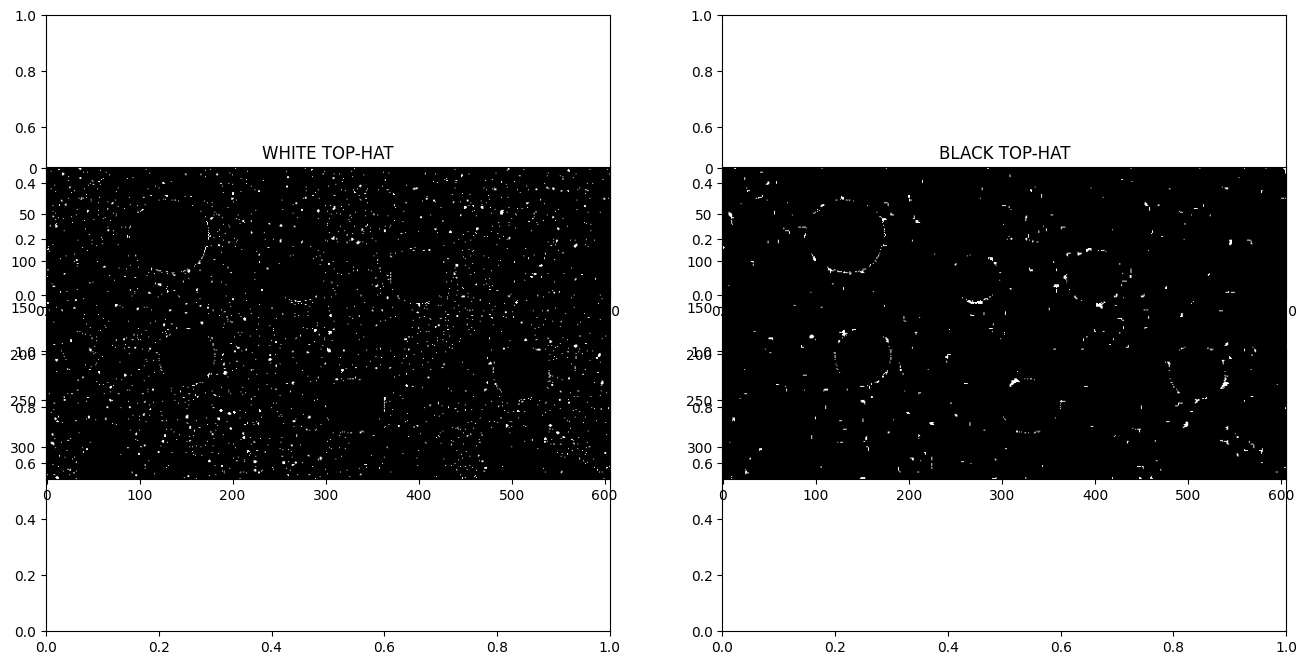

In [ ]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, selem1)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, selem1)

fig,axes=plt.subplots(2,2,figsize=(16,8))
plt.subplot(121)
plt.imshow(tophat, cmap="gray")
plt.title("WHITE TOP-HAT")
plt.subplot(122)
plt.imshow(blackhat, cmap="gray")
plt.title("BLACK TOP-HAT")
plt.show()


3. Cual es la diferencia entre white top-hat y black top-hat?

La diferencia principal radica en que white top-hat resalta características brillantes pequeñas, mientras que black top-hat destaca características oscuras pequeñas, basándose en la interacción del elemento estructurante con la imagen.


### 3. En la imagen cuadros.png use la transformacion de acierto y falla para marcar la esquina superior izquerda de cada cuadrilatero
* Reporte el total de cuadrilateros en la imagen
* Compruebe el funcionamiento del algoritmo usando la imagen cuadrosT.png

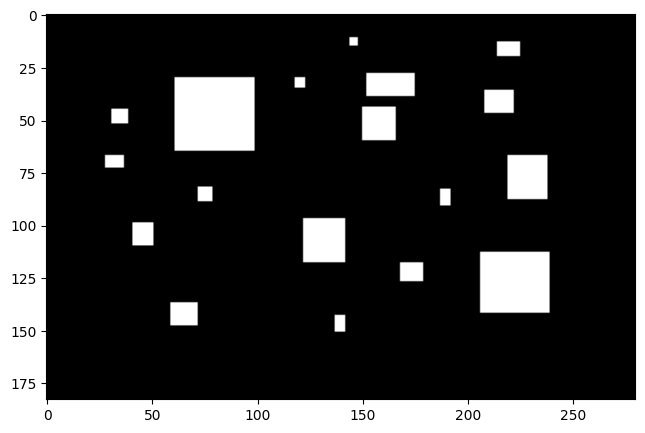

In [ ]:
img = cv2.imread("Imagenes/cuadros.png",0)
img = np.uint8(img>128)
plt.subplots(figsize = (10,5))
plt.imshow(img, cmap="gray")
plt.show()

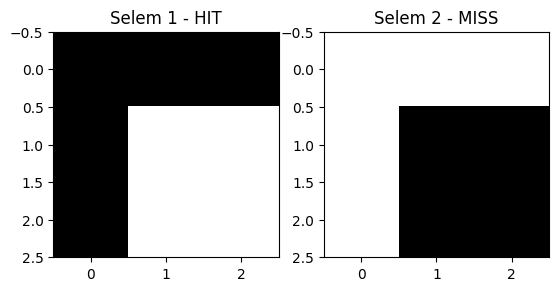

In [ ]:
selem1=np.array([[0,0,0],[0,1,1],[0,1,1]], dtype=np.uint8)  #HIT
selem2=np.array([[1,1,1],[1,0,0],[1,0,0]], dtype=np.uint8)  #MISS

plt.subplot(1,2,1)
plt.imshow(selem1, cmap="gray")
plt.title("Selem 1 - HIT")
plt.subplot(1,2,2)
plt.imshow(selem2, cmap="gray")
plt.title("Selem 2 - MISS")
plt.show()

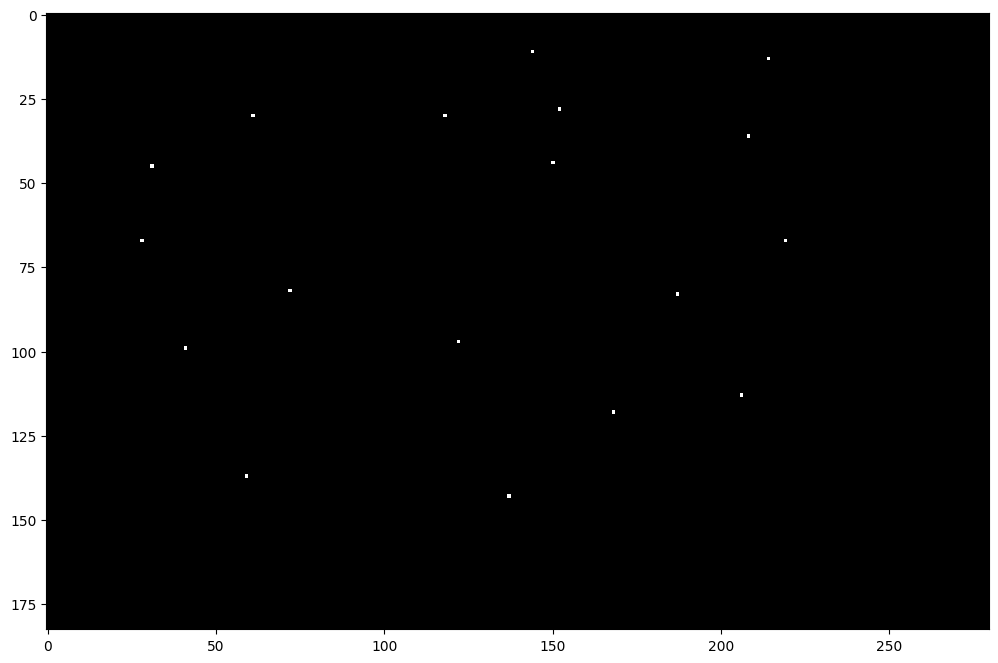

18 Cuadrados


In [ ]:
img_ero_hit = cv2.erode(img, selem1)
img_ero_miss = cv2.erode(1-img, selem2)

res= cv2.bitwise_and(img_ero_hit,img_ero_miss)
plt.subplots(figsize=(18,8))
plt.imshow(res, cmap="gray")
plt.show()

print(np.sum(res), "Cuadrados")

```
4. Cree que esta transformación serviría para encontrar los rectángulos si estos estuviesen girados?

No, para que pudiera encontrarlos, se tendría que rotar el elemento estructurante para que conincida con el mismo patrón

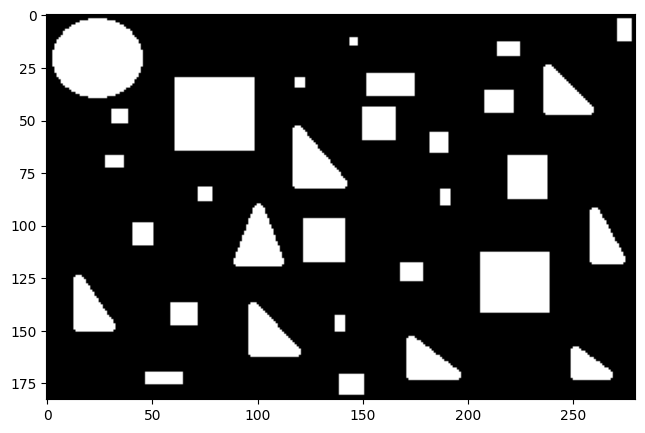

In [ ]:
#COMPROBANDO EN CUADROS T
img2 = cv2.imread("Imagenes/cuadrosT.png",0)
img2 = np.uint8(img2>128)
plt.subplots(figsize = (10,5))
plt.imshow(img2, cmap="gray")
plt.show()

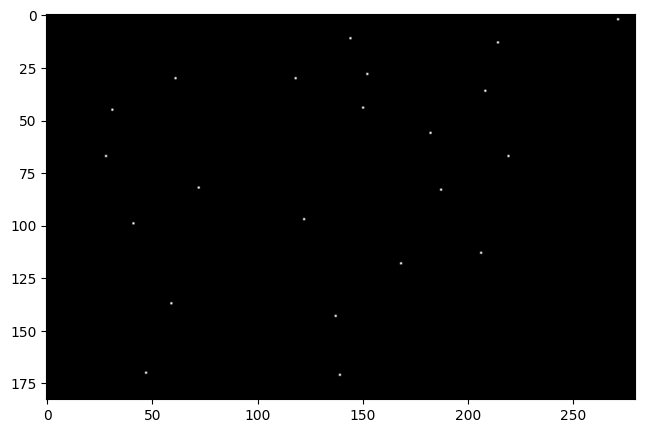

22 Cuadrilateros


In [ ]:
img_ero_hit = cv2.erode(img2, selem1, iterations = 1)
img_ero_miss = cv2.erode(1-img2, selem2, iterations = 1)

res= img_ero_hit * img_ero_miss
plt.subplots(figsize=(12,5))
plt.imshow(res, cmap="gray")
plt.show()

print(np.sum(res), "Cuadrilateros")

### 4. Encuentre el borde de una imagen utilizando el gradiente morfológico
* Dilatación - erosión

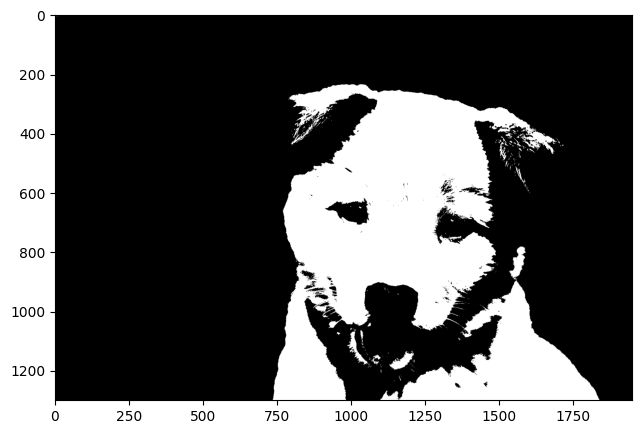

In [ ]:
img = cv2.imread("Imagenes/puppy.jpg",0)
img = np.uint8(img>80)
plt.subplots(figsize = (10,5))
plt.imshow(img, cmap="gray")
plt.show()

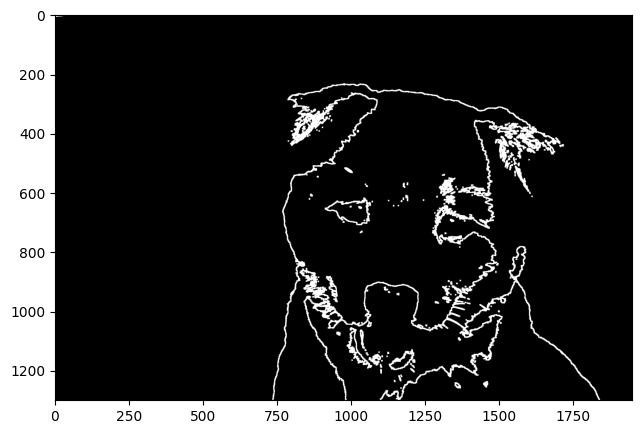

In [ ]:
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, selem1)

plt.subplots(figsize = (10,5))
plt.imshow(gradient, cmap="gray")
plt.show()

```
5. Que pasa si el elemento estructurante es de 11x11?


Si se utiliza un elemento estructurante de 11x11, las operaciones morfológicas afectarán estructuras más grandes en la imagen, suavizando los detalles pequeños y centrándose en patrones o cambios de intensidad a mayor escala.

### 5. Implemente un algoritmo para encontrar los puntos finales de la figura lineas.png
* Reutilize la funcion filtro_espacial elaborado en el laboratorio 2

In [ ]:
def filtro_espacial(imagen,selem):
    M,N=imagen.shape
    m,n=selem.shape

    nueva_imagen=np.zeros((M+m-1,N+n-1)) #Imagen con filas y columnas extra

    cm=np.uint16((m-1)/2)
    cn=np.uint16((n-1)/2)

    nueva_imagen[cm:cm+M,cn:cn+N]=imagen

    salida=np.zeros((nueva_imagen.shape))

    for i in np.uint16(np.arange(cm,cm+M)):
        for j in np.uint16(np.arange(cn,cn+N)):

            seccion_imagen=nueva_imagen[i-cm:i+cm+1,j-cn:j+cn+1]
            result_seccion=seccion_imagen*selem
            score=np.sum(result_seccion)

            if(nueva_imagen[i,j]==1):
                if (score==2):
                    salida[i,j]=1
                else:
                    salida[i,j]=0
            else:
                salida[i,j]=0

    #recortar del mismo tamaño
    result_img=salida[cm:cm+M,cn:cn+N]

    return result_img

```
6. Por qué es necesario verificar que score==2 en el algoritmo anterior?

Es necesario verificar que score == 2 porque este valor específico cumple con la condición lógica definida por el algoritmo para determinar si un píxel debe activarse o no en la imagen de salida. Esta verificación asegura que el comportamiento del algoritmo respete la relación exacta entre el píxel en cuestión, su vecindario, y el elemento estructurante aplicado.

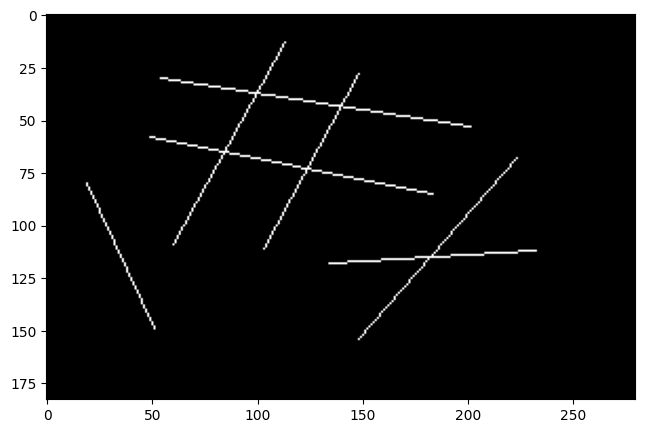

In [ ]:
img3=cv2.imread("Imagenes/lineas1.png",0)
img3=img3>128

plt.subplots(figsize=(10,5))
plt.imshow(img3, cmap="gray")
plt.show()

In [ ]:
selem=np.array([[1,1,1],[1,1,1],[1,1,1]])
img3_final_points=filtro_espacial(img3,selem)

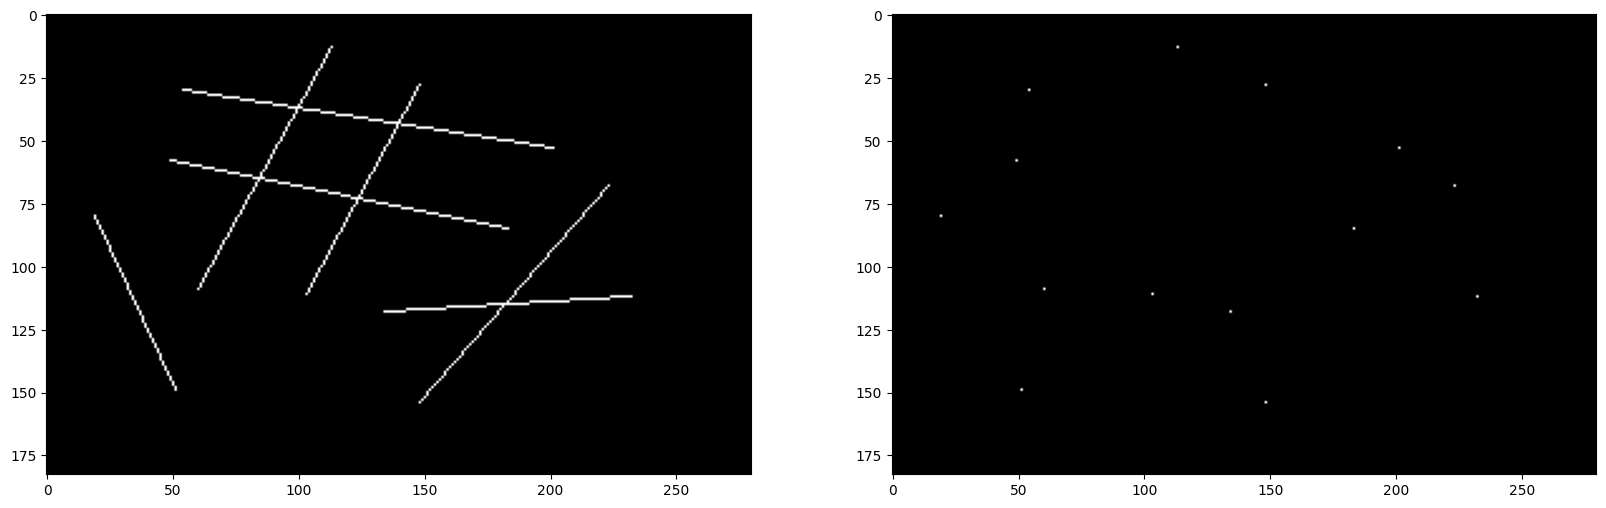

In [ ]:
plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
plt.imshow(img3, cmap="gray")
plt.subplot(122)
plt.imshow(img3_final_points, cmap="gray")
plt.show()

### 6. Adelgazamiento y esqueletización de una imagen binaria
* Trabaje con la imagen huella.jpg, muestre una imagen comparativa de sus resultados

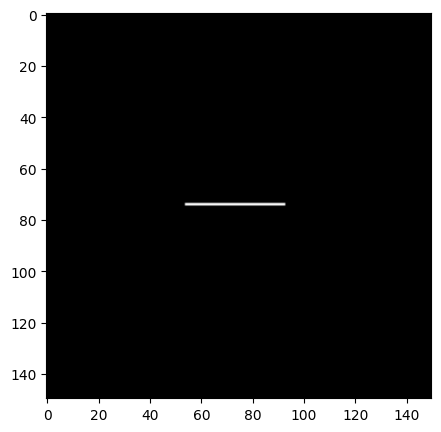

In [ ]:
#Adelgazamiento
img = cv2.imread("Imagenes/im1.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

thinned = cv2.ximgproc.thinning(img)

plt.subplots(figsize=(10,5))
plt.imshow(thinned, cmap="gray")
plt.show()

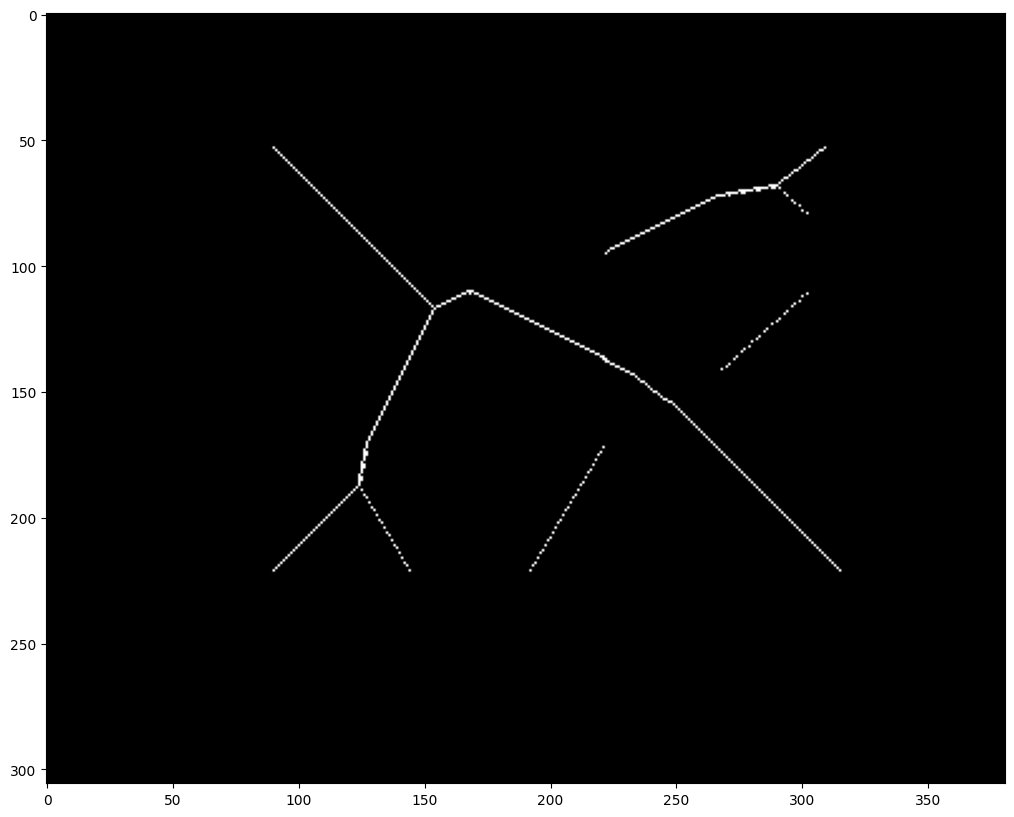

In [ ]:
#Skel
img = cv2.imread("Imagenes/irregular.png", 0)

_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

skel = np.zeros(img.shape, np.uint8)

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded = cv2.erode(img, element)
    opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(eroded, opened)
    skel = cv2.bitwise_or(skel,temp)

    img = eroded.copy()

    if cv2.countNonZero(img)==0:
        break

plt.subplots(figsize=(18,10))
plt.imshow(skel, cmap="gray")
plt.show()

```
7. Despues de aplicar el algoritmo de skel y el de adelgazamiento sobre una misma imágen. Son estas operaciones iguales?

No, las operaciones de esqueletización (skeletonization) y adelgazamiento (thinning) no son iguales, aunque ambas buscan reducir el grosor de los objetos en una imagen binaria. Mientras el adelgazamiento busca una representación más precisa del eje geométrico central de los objetos, la esqueletización se enfoca en simplificar la estructura de los objetos manteniendo su conectividad y forma básica, pero puede ser menos precisa en términos de ubicación del centro geométrico.

### 7. Etiquete la imagen form.png y muestre aisladamente una de las formas


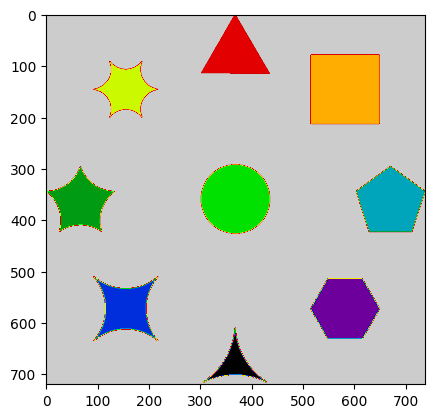

10


In [ ]:
img = cv2.imread("Imagenes/form.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

num_labels, labels_im = cv2.connectedComponents(img, connectivity=8)

plt.imshow(labels_im, cmap="nipy_spectral_r")
plt.show()
print(num_labels)

```
8. Cuál es la función del parámetro connectivity?

El parámetro connectivity define el criterio para considerar que dos píxeles están conectados, influenciando cómo se agrupan los píxeles para formar componentes conectados en una imagen binaria.

In [ ]:
print(labels_im[300:400, 300:400])

[[0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]]


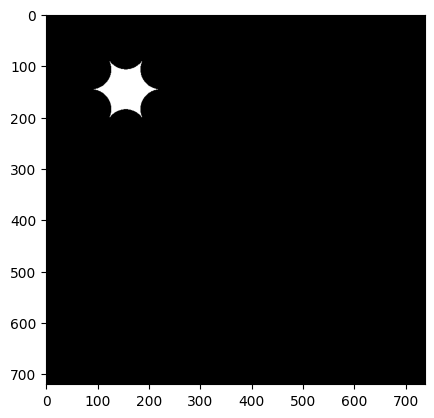

10


In [ ]:
plt.imshow(labels_im==3, cmap="gray")
plt.show()
print(num_labels)

### 8. Con la imagen "mark.png" realize la Reconstruccion de las 3 formas correspondientes

In [ ]:
def reconstruccion_morf(img, marcador, selem):
    while True:
        dilate = cv2.dilate(marcador, selem)
        reconstruida = cv2.bitwise_and(dilate, img)

        if np.array_equal(marcador, reconstruida):
            return reconstruida
        else:
            marcador = reconstruida

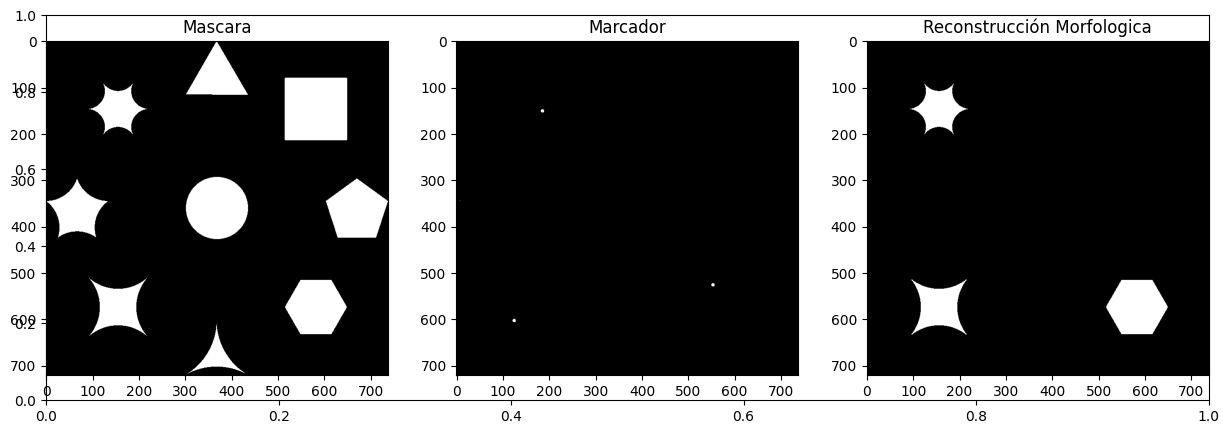

In [ ]:
img = cv2.imread("Imagenes/form.png", 0)
_,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

marker = cv2.imread("Imagenes/mark.png",0)
_,marker0 = cv2.threshold(marker, 127, 255, cv2.THRESH_BINARY)

selem = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

reconstruida = reconstruccion_morf(img, marker0, selem)

plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Mascara")
plt.subplot(1,3,2)
plt.imshow(marker, cmap="gray")
plt.title("Marcador")
plt.subplot(1,3,3)
plt.imshow(reconstruida, cmap="gray")
plt.title("Reconstrucción Morfologica")
plt.show()

```
9. Si usted tuviera un conjunto de elementos de igual forma pero diferente tamaño, en el que usted quiere únicamente los mas grandes sin ningún tipo de modificación, describa la secuencia de pasos para lograr este objetivo usuando únicamente operaciones de morfología? (el tamaño de los objetos seleccionados debe ser el mismo)

Binarización: Si no es binaria, convierte la imagen a una representación binaria mediante un umbral adecuado.

Apertura con un elemento estructurante creciente:
Realiza aperturas iterativas con elementos estructurantes de tamaños incrementales hasta que los objetos más pequeños desaparezcan y solo los más grandes permanezcan.

Reconstrucción morfológica:
Usa los objetos resultantes de las aperturas como marcadores y realiza una reconstrucción morfológica en la imagen binaria original para restaurar los objetos grandes a su forma completa, sin alterar su tamaño.

Validación y refinamiento:
Si es necesario, ajusta el tamaño del elemento estructurante para filtrar objetos adicionales que no cumplan el criterio de tamaño.

Esta secuencia utiliza exclusivamente operaciones morfológicas sin necesidad de cálculo explícito del tamaño de los objetos, aprovechando las propiedades del elemento estructurante y la reconstrucción para preservar únicamente los objetos grandes.

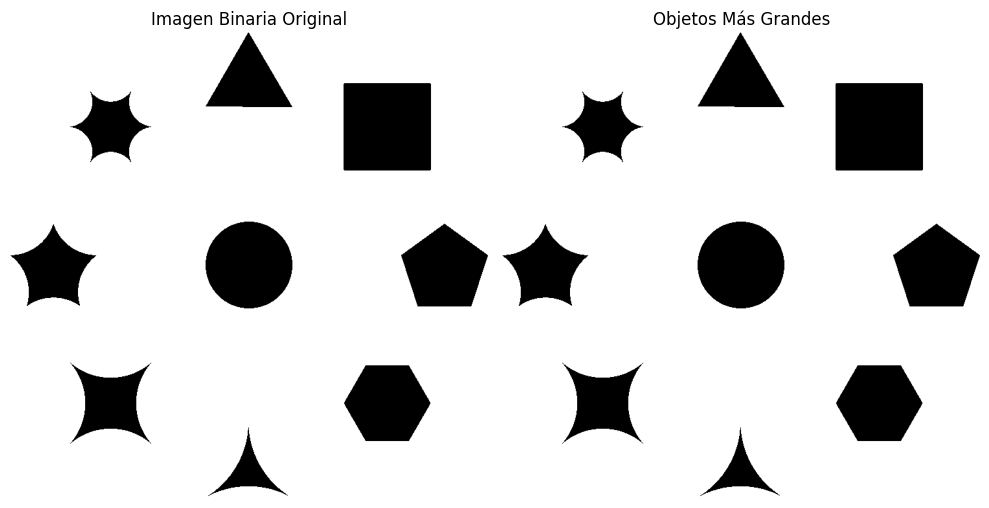

In [ ]:
import cv2
import numpy as np
from skimage.morphology import reconstruction
import matplotlib.pyplot as plt

# Función principal para seleccionar los objetos más grandes
def seleccionar_objetos_mas_grandes(binary_image):
    # 1. Etiquetar los objetos en la imagen binaria
    num_labels, labels = cv2.connectedComponents(binary_image)

    # 2. Calcular el área (número de píxeles) de cada objeto
    areas = [np.sum(labels == i) for i in range(num_labels)]

    # 3. Determinar el tamaño máximo (los objetos más grandes)
    max_area = max(areas)

    # 4. Crear una imagen binaria para almacenar los objetos más grandes
    filtered_image = np.zeros_like(binary_image)
    for i, area in enumerate(areas):
        if area == max_area:  # Seleccionar objetos con tamaño igual al máximo
            filtered_image[labels == i] = 255

    # 5. Reconstrucción morfológica para mayor precisión
    marker = filtered_image  # El marcador es la imagen filtrada
    mask = binary_image      # La máscara es la imagen binaria original
    reconstructed = reconstruction(marker, mask, method='dilation')

    return reconstructed

# Código de ejemplo
if __name__ == "__main__":
    # 1. Leer la imagen binaria
    binary_image = cv2.imread("Imagenes/form.png", 0)
    _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

    # 2. Seleccionar los objetos más grandes
    objetos_grandes = seleccionar_objetos_mas_grandes(binary_image)

    # 3. Visualizar los resultados
    plt.figure(figsize=(10, 5))

    # Imagen original binaria
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Imagen Binaria Original")
    plt.axis("off")

    # Objetos más grandes seleccionados
    plt.subplot(1, 2, 2)
    plt.imshow(objetos_grandes, cmap="gray")
    plt.title("Objetos Más Grandes")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


### 9. implemente el algoritmo llenado de huecos descrito en la clase teorica, luego apliquela a la imagen latas1.jpg
* Binarize con un umbral de 40 y haga una apertura con un selem de radio 3
* g= -(reconstruccion(fm,~f ))
* fm ={1 - f ; solo si el pixel pertenece al borde

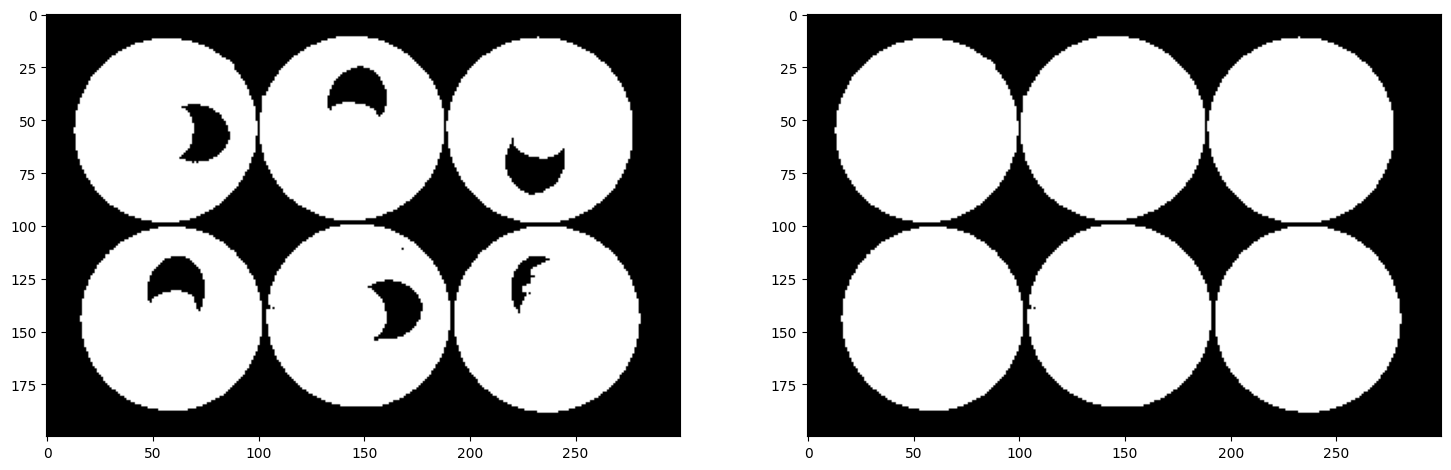

In [ ]:
img = cv2.imread("Imagenes/latas1.jpg",0)
_,img = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem)  #Para limpiar ruido

marker=np.zeros(img.shape, dtype=np.uint8)
marker[0,:] = ~img_open[0,:]
marker[-1,:] = ~img_open[-1,:]
marker[:,0] = ~img_open[:,0]
marker[:,-1] = ~img_open[:,-1]

img_recons = reconstruccion_morf(~img_open, marker, selem)

g = cv2.bitwise_not(img_recons)

plt.subplots(1,2,figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(img_open, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(g, cmap="gray")
plt.show()

### 10. De la imagen comp2.jpg intente obtener solo los integrados, y luego limpie aquellos que estan pegados al borde de la imagen
* Binarize con un umbral de 80 y haga una apertura con un selem de radio 3
* g= -(reconstruccion(fm,~f ))
* fm ={1 - f ; solo si el pixel pertenece al borde

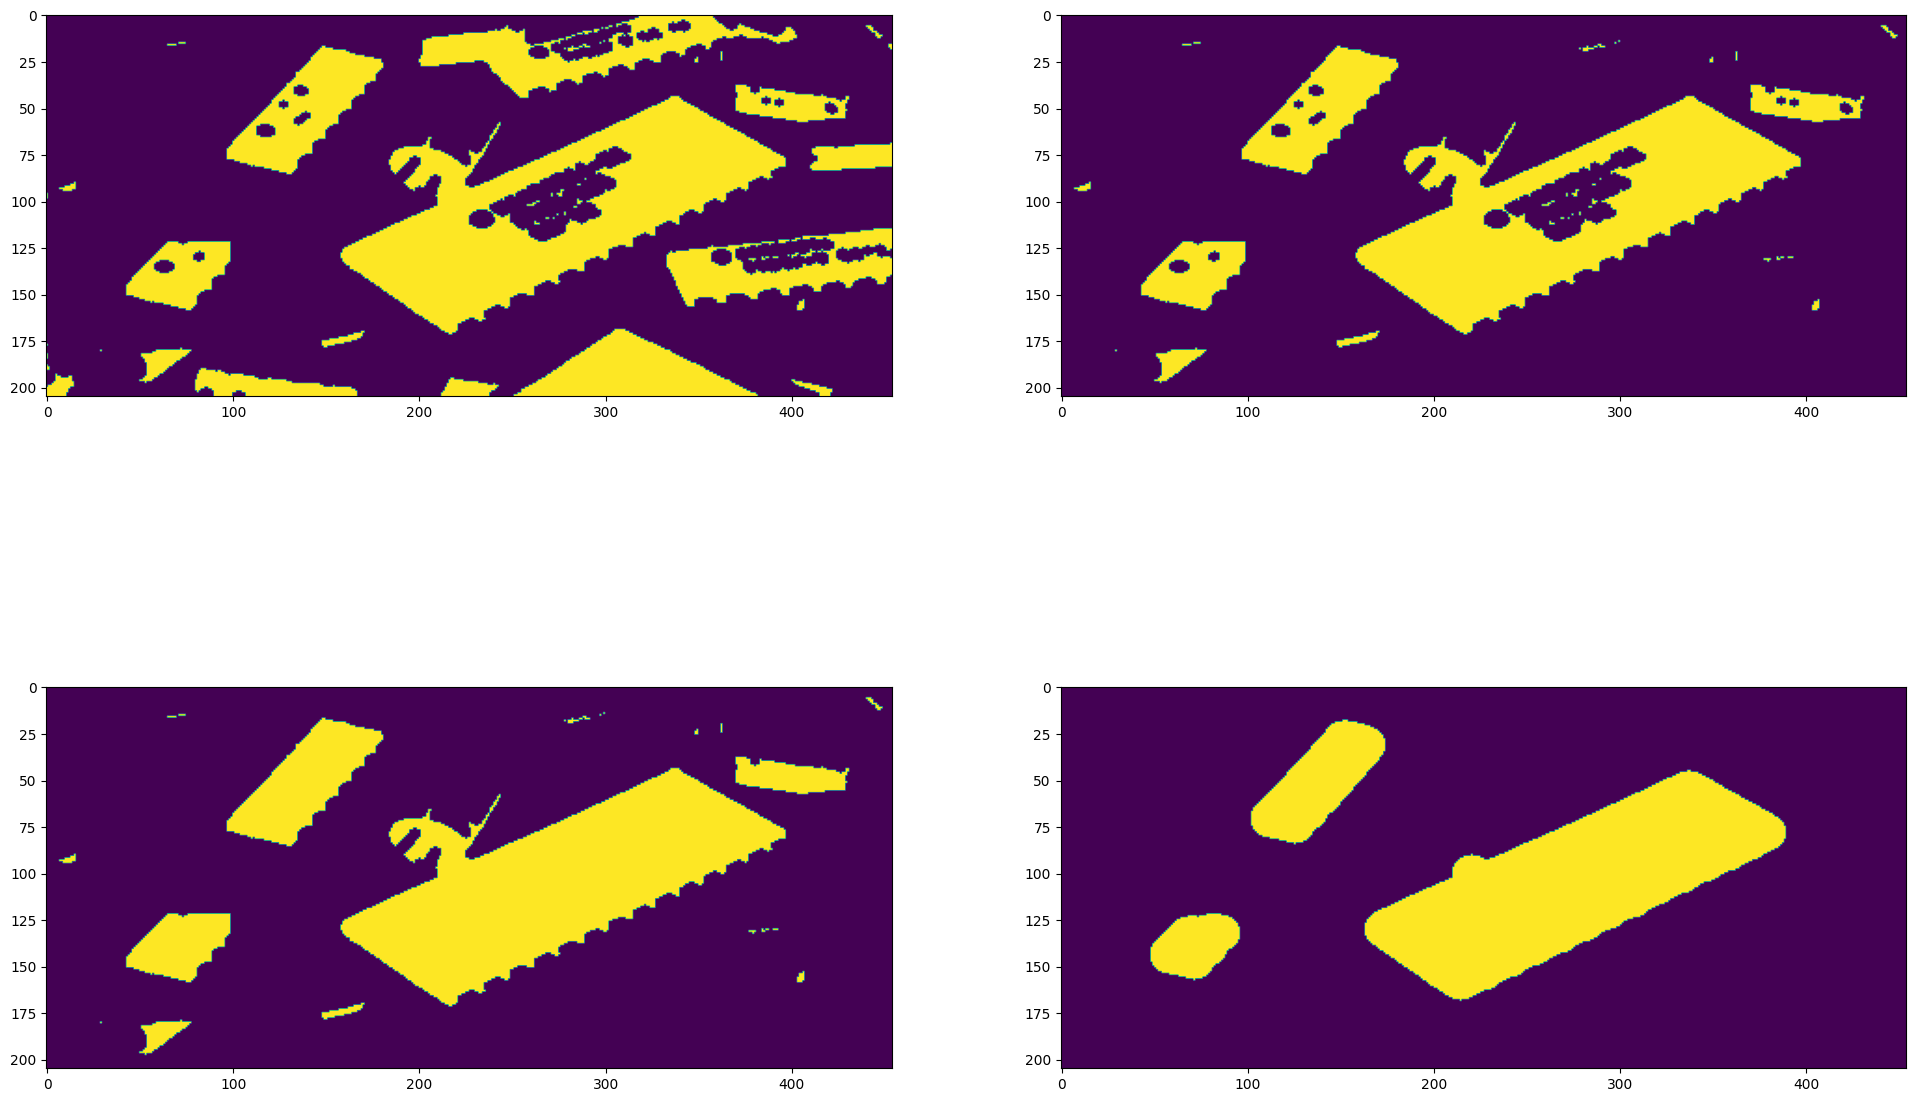

In [ ]:
img_gray = cv2.imread("Imagenes/comp2.jpg",0)
_,img = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)

selem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img = cv2.erode(img,selem)
img_e = img.copy() #para mostrar

#Limpieza de bordes
marker=np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)

marker[0,:] = img[0,:]
marker[-1,:] = img[-1,:]
marker[:,0] = img[:,0]
marker[:,-1]= img[:,-1]

img_recons = reconstruccion_morf(img,marker,selem)
g = img-img_recons

#Llenado de huecos
marker2=np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)
marker2[0,:] = ~g[0,:]
marker2[-1,:] = ~g[-1,:]
marker2[:,0] = ~g[:,0]
marker2[:,-1] = ~g[:,-1]

img_recons2 = ~reconstruccion_morf(~g, marker2,selem) #Llenado de huecos

#Apertura
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21,21))
img_recons3= cv2.morphologyEx(img_recons2,cv2.MORPH_OPEN,selem2)

plt.subplots(2,2,figsize=(24,16))
plt.subplot(221)
plt.imshow(img_e)
plt.subplot(222)
plt.imshow(g)
plt.subplot(223)
plt.imshow(img_recons2)
plt.subplot(224)
plt.imshow(img_recons3)
plt.show()


10. Como obtendría los integrados segmentados con sus colores rgb a partir del resultado de la imagen anterior?

Leer la imagen original en color y la imagen segmentada binaria:
Carga la imagen original en color y la imagen segmentada (la máscara) para identificar los objetos.

Etiquetar los componentes conectados:
Usa cv2.connectedComponents() o cv2.findContours() en la imagen segmentada para identificar las regiones individuales de los objetos.

Crear máscaras para cada objeto:
Genera una máscara individual para cada objeto identificado. Esto se puede hacer utilizando las etiquetas obtenidas.

Extraer los colores de los objetos segmentados:
Aplica cada máscara a la imagen original en color utilizando cv2.bitwise_and(). Esto extrae únicamente los píxeles correspondientes al objeto en la imagen original.

Almacenar o visualizar los colores segmentados:
Guarda o visualiza los objetos segmentados con sus colores originales.



In [ ]:
import cv2
import numpy as np

# Cargar la imagen original en color
img_color = cv2.imread("Imagenes/comp2.jpg")

# Asegúrate de que la imagen procesada (img_recons3) sea binaria
# y tenga el mismo tamaño que img_color
# Supongamos que img_recons3 es la imagen binaria resultante

# Crear una lista para almacenar los colores segmentados
colores_segmentados = []

# Encontrar contornos en la imagen binaria
contornos, _ = cv2.findContours(img_recons3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterar sobre cada contorno encontrado
for contorno in contornos:
    # Crear una máscara para el contorno actual
    mascara = np.zeros(img_color.shape[:2], dtype=np.uint8)
    cv2.drawContours(mascara, [contorno], -1, 255, -1)  # Rellenar el contorno

    # Obtener los píxeles de la imagen original donde la máscara es 255
    segmento = cv2.bitwise_and(img_color, img_color, mask=mascara)

    # Calcular el color promedio del segmento
    color_promedio = cv2.mean(segmento, mask=mascara)[:3]  # Solo los primeros 3 valores (B, G, R)
    colores_segmentados.append(color_promedio)

# Mostrar los colores segmentados
for i, color in enumerate(colores_segmentados):
    print(f"Segmento {i + 1}: Color RGB = {color}")


Segmento 1: Color RGB = (47.44279835390947, 47.568724279835386, 47.647736625514405)
Segmento 2: Color RGB = (59.835606604450824, 59.581957406078004, 59.48671931083991)
Segmento 3: Color RGB = (50.46122448979592, 50.30897959183674, 50.277959183673474)


### 11. Implemente las operaciones morfologicas basicas en tiempo real.

In [ ]:
cap = cv2.VideoCapture(0)

selem1 = np.ones((5,5),np.uint8)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower = np.array([90,100,100])
    upper = np.array([130,255,255])

    mask = cv2.inRange(hsv, lower, upper)


    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, selem1)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, selem1)
    gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, selem1)

    res = cv2.bitwise_and(frame,frame, mask=closing)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)
    cv2.imshow('Gradient',gradient)
    cv2.imshow('Segmentacion',res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


```
Cada estudiante debe escribir una reflexión propia sobre el aprendizaje obtenido con la presenta guía
```


Alcántara Vásquez Jorge:
En esta guía, aprendí sobre el uso de operaciones morfológicas avanzadas, como la reconstrucción morfológica y el esqueletizado, y cómo aplicarlas para procesar imágenes binarias de manera eficiente. Además, comprendí la importancia del tamaño y la forma del elemento estructurante en los resultados obtenidos.

Gutiérrez Córdova René:
Entendi la importancia de segmentar imágenes utilizando operaciones morfológicas básicas y avanzadas. También entendí cómo usar herramientas como connectedComponents para identificar y etiquetar componentes conectados, y cómo estas técnicas son esenciales en el procesamiento de imágenes.

Quezada Portilla Diego:
En esta guía, aprendí a combinar operaciones morfológicas y reconstrucción para resolver problemas complejos de segmentación de imágenes. También comprendí el impacto de los parámetros de conectividad y la forma del elemento estructurante al procesar regiones conectadas.

Vásquez Silva Augusto:
Pude entender que la aplicarcion de operaciones como dilatación, erosión, y etiquetado de componentes conectados para analizar y segmentar objetos en imágenes. También entendí cómo usar máscaras y marcadores para garantizar precisión en los resultados obtenidos.